**Note:** If you encounter any errors about string operations, please restart the kernel and re-run all cells from the beginning.

# Detector Sweep Statistical Analysis

This notebook demonstrates statistical analysis of detector sweep results using both:
1. **Sweep-level analysis** - Aggregated results across all trajectories for each detector count
2. **Trajectory-level analysis** - Individual trajectory results for a specific detector count

In [1]:
import sys
import os

# Add src to path
sys.path.append(os.path.join(os.getcwd(), 'src'))

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from stats_analysis import SweepAnalyzer, TrajectoryAnalyzer, compare_detector_counts

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100

## Part 1: Sweep-Level Analysis

Analyze the aggregated results across all detector counts.

In [2]:
# Load sweep results
sweep_path = 'results/sweep_example/detector_sweep_results.csv'
sweep_analyzer = SweepAnalyzer(sweep_path)

# Show the raw data
print("=== Detector Sweep Data ===")
sweep_analyzer.df

=== Detector Sweep Data ===


,n_detectors,optimization_time_seconds,mean_cumulative_detection_prob,mean_avg_detection_per_second,mean_time_in_observable,mean_time_in_nonobservable,mean_sliding_window_5s_min,mean_sliding_window_5s_max,mean_sliding_window_5s_mean,mean_sliding_window_10s_min,...,mean_sliding_window_15s_mean,mean_sliding_window_30s_min,mean_sliding_window_30s_max,mean_sliding_window_30s_mean,mean_sliding_window_60s_min,mean_sliding_window_60s_max,mean_sliding_window_60s_mean,detector_mean_coverage,detector_min_coverage,detector_fraction_covered
0,15,163.126113,0.777145,0.076924,410.171429,245.771429,0.0,0.762783,0.150750,0.000000,...,0.247300,0.000000,0.777145,0.357785,0.008662,0.777145,0.478348,0.065049,0.0,0.053495
1,20,229.884625,0.999995,0.131933,411.200000,245.800000,0.0,0.998724,0.284562,0.000000,...,0.476979,0.035031,0.999995,0.692578,0.462867,0.999995,0.882299,0.086732,0.0,0.071327
2,25,280.933282,0.999995,0.155794,412.342857,245.742857,0.0,0.998952,0.316929,0.000000,...,0.517709,0.026589,0.999995,0.739216,0.566864,0.999995,0.937234,0.108413,0.0,0.089158
3,30,382.214539,0.857652,0.155440,411.542857,245.828571,0.0,0.857243,0.337216,0.000000,...,0.544116,0.250918,0.857652,0.728812,0.631667,0.857652,0.837758,0.130079,0.0,0.106990
4,40,449.203008,0.999988,0.171169,410.885714,246.085714,0.0,0.996414,0.385515,0.002158,...,0.629216,0.183569,0.999985,0.821014,0.727826,0.999988,0.947297,0.173132,0.0,0.142653


In [3]:
# Summary statistics
print("\n=== Summary Statistics ===")
sweep_analyzer.summary_statistics()


=== Summary Statistics ===


,count,mean,std,min,25%,50%,75%,max,median
n_detectors,5.0,26.000000,9.617692,15.000000,20.000000,25.000000,30.000000,40.000000,25.000000
optimization_time_seconds,5.0,301.072313,115.140333,163.126113,229.884625,280.933282,382.214539,449.203008,280.933282
mean_cumulative_detection_prob,5.0,0.926955,0.103982,0.777145,0.857652,0.999988,0.999995,0.999995,0.999988
mean_avg_detection_per_second,5.0,0.138252,0.037040,0.076924,0.131933,0.155440,0.155794,0.171169,0.155440
mean_time_in_observable,5.0,411.228571,0.802547,410.171429,410.885714,411.200000,411.542857,412.342857,411.200000
mean_time_in_nonobservable,5.0,245.845714,0.137914,245.742857,245.771429,245.800000,245.828571,246.085714,245.800000
mean_sliding_window_5s_min,5.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mean_sliding_window_5s_max,5.0,0.922823,0.108266,0.762783,0.857243,0.996414,0.998724,0.998952,0.996414
mean_sliding_window_5s_mean,5.0,0.294994,0.088562,0.150750,0.284562,0.316929,0.337216,0.385515,0.316929
mean_sliding_window_10s_min,5.0,0.000432,0.000965,0.000000,0.000000,0.000000,0.000000,0.002158,0.000000


In [4]:
# Detection statistics by detector count
print("\n=== Detection Stats by Detector Count ===")
sweep_analyzer.detection_stats_by_detector_count()


=== Detection Stats by Detector Count ===


,mean_cumulative_detection_prob,mean_avg_detection_per_second,mean_time_in_nonobservable
n_detectors,,,
15,0.777145,0.076924,245.771429
20,0.999995,0.131933,245.800000
25,0.999995,0.155794,245.742857
30,0.857652,0.155440,245.828571
40,0.999988,0.171169,246.085714


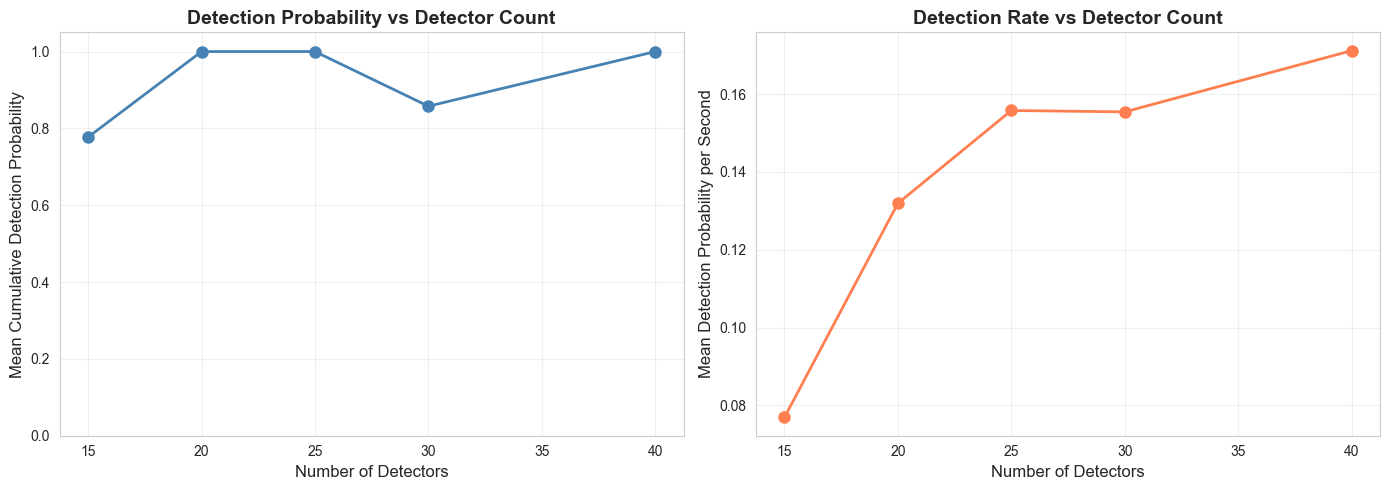

In [5]:
# Plot detection probability vs detector count
sweep_analyzer.plot_detection_vs_detectors(figsize=(14, 5))
plt.show()

### Sliding Window Analysis


=== Mean Detection for All Time Windows ===
                   5s       10s       15s       30s       60s
n_detectors                                                  
15           0.150750  0.199712  0.247300  0.357785  0.478348
20           0.284562  0.387810  0.476979  0.692578  0.882299
25           0.316929  0.424683  0.517709  0.739216  0.937234
30           0.337216  0.450189  0.544116  0.728812  0.837758
40           0.385515  0.523767  0.629216  0.821014  0.947297


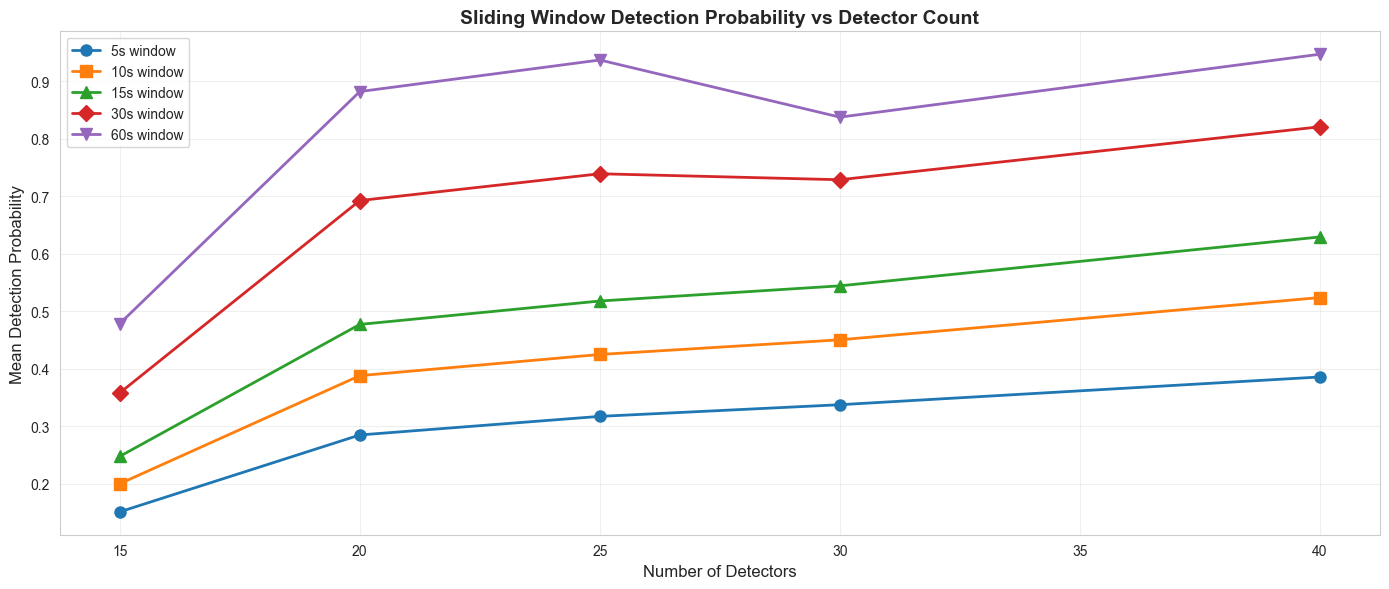

In [6]:
# All sliding window means
print("\n=== Mean Detection for All Time Windows ===")
window_means = sweep_analyzer.all_window_means()
print(window_means)

# Plot all sliding windows
sweep_analyzer.plot_sliding_windows(figsize=(14, 6))
plt.show()

In [7]:
# Detailed stats for specific window sizes
for window in ['5s', '10s', '30s', '60s']:
    print(f"\n=== Sliding Window {window} ===")
    print(sweep_analyzer.sliding_window_stats(window))


=== Sliding Window 5s ===
             mean_sliding_window_5s_min  mean_sliding_window_5s_max  \
n_detectors                                                           
15                                  0.0                    0.762783   
20                                  0.0                    0.998724   
25                                  0.0                    0.998952   
30                                  0.0                    0.857243   
40                                  0.0                    0.996414   

             mean_sliding_window_5s_mean  
n_detectors                               
15                              0.150750  
20                              0.284562  
25                              0.316929  
30                              0.337216  
40                              0.385515  

=== Sliding Window 10s ===
             mean_sliding_window_10s_min  mean_sliding_window_10s_max  \
n_detectors                                                             


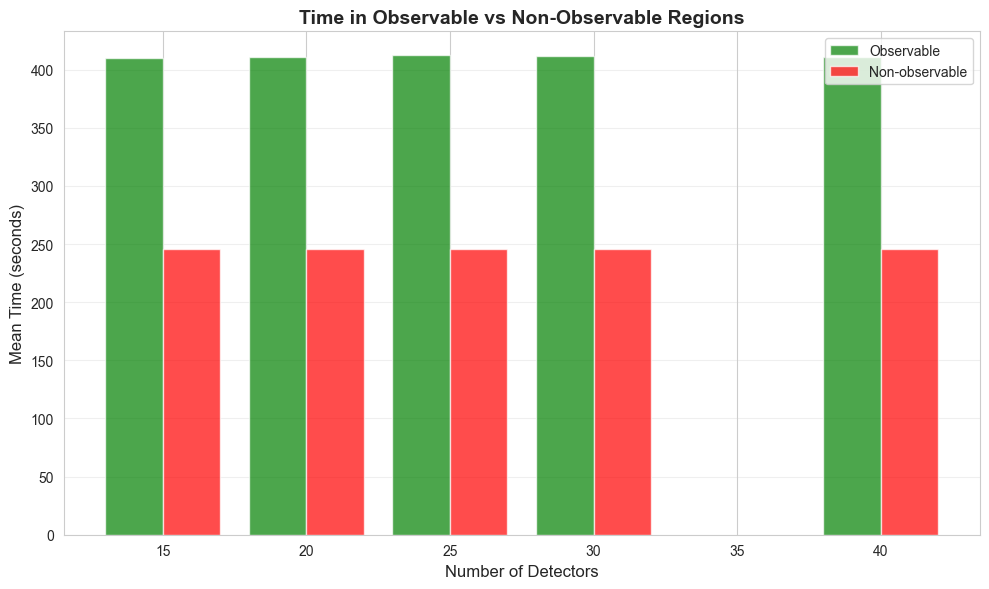

In [8]:
# Time analysis
sweep_analyzer.plot_time_analysis(figsize=(10, 6))
plt.show()

## Part 2: Trajectory-Level Analysis

Analyze individual trajectory results for specific detector counts.

In [9]:
# Analyze trajectories for n=15 detectors
traj_path_15 = 'results/sweep_example/n15_detectors/with_detectors_exclude_observable.csv'
traj_analyzer_15 = TrajectoryAnalyzer(traj_path_15)

print(f"\n=== Trajectory Analysis: {traj_analyzer_15.n_detectors} Detectors ===")
print(f"Number of trajectories: {len(traj_analyzer_15.df)}")

# Show first few trajectories
print("\nFirst 5 trajectories:")
traj_analyzer_15.df.head()


=== Trajectory Analysis: 15 Detectors ===
Number of trajectories: 36

First 5 trajectories:


,trajectory_id,cumulative_detection_prob,avg_detection_per_second,time_in_observable,time_in_nonobservable,sliding_window_5s_min,sliding_window_5s_max,sliding_window_5s_mean,sliding_window_10s_min,sliding_window_10s_max,sliding_window_10s_mean,sliding_window_15s_min,sliding_window_15s_max,sliding_window_15s_mean,sliding_window_30s_min,sliding_window_30s_max,sliding_window_30s_mean,sliding_window_60s_min,sliding_window_60s_max,sliding_window_60s_mean
0,0.0,1.0,0.140212,331.0,351.0,0.0,1.0,0.269956,0.0,1.0,0.348717,0.0,1.0,0.418741,0.0,1.0,0.591239,0.0,1.0,0.806063
1,1.0,1.0,0.199893,323.0,349.0,0.0,1.0,0.344430,0.0,1.0,0.423059,0.0,1.0,0.489578,0.0,1.0,0.631048,0.0,1.0,0.849419
2,2.0,1.0,0.146650,318.0,353.0,0.0,1.0,0.288651,0.0,1.0,0.370130,0.0,1.0,0.440574,0.0,1.0,0.605506,0.0,1.0,0.818923
3,3.0,1.0,0.145151,321.0,352.0,0.0,1.0,0.277349,0.0,1.0,0.357294,0.0,1.0,0.426678,0.0,1.0,0.591338,0.0,1.0,0.802081
4,4.0,1.0,0.137302,320.0,351.0,0.0,1.0,0.263843,0.0,1.0,0.342831,0.0,1.0,0.412339,0.0,1.0,0.585292,0.0,1.0,0.805240


In [10]:
# Summary statistics for trajectories
print("\n=== Trajectory Summary Statistics ===")
traj_analyzer_15.summary_statistics()


=== Trajectory Summary Statistics ===


,count,mean,std,min,25%,50%,75%,max,median
cumulative_detection_prob,36.0,0.777145,0.401565,0.0,0.781789,1.000000,1.000000,1.000000,1.000000
avg_detection_per_second,36.0,0.076924,0.055968,0.0,0.030839,0.075620,0.121959,0.199893,0.075620
time_in_observable,36.0,410.171429,72.819340,318.0,348.250000,413.085714,450.250000,557.000000,413.085714
time_in_nonobservable,36.0,245.771429,77.818134,89.0,216.750000,241.000000,299.250000,353.000000,241.000000
sliding_window_5s_min,36.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
sliding_window_5s_max,36.0,0.762783,0.410737,0.0,0.690458,0.999980,1.000000,1.000000,0.999980
sliding_window_5s_mean,36.0,0.150750,0.107068,0.0,0.061760,0.153297,0.255286,0.344430,0.153297
sliding_window_10s_min,36.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
sliding_window_10s_max,36.0,0.772491,0.403216,0.0,0.745658,1.000000,1.000000,1.000000,1.000000
sliding_window_10s_mean,36.0,0.199712,0.139656,0.0,0.082373,0.218754,0.343771,0.423059,0.218754


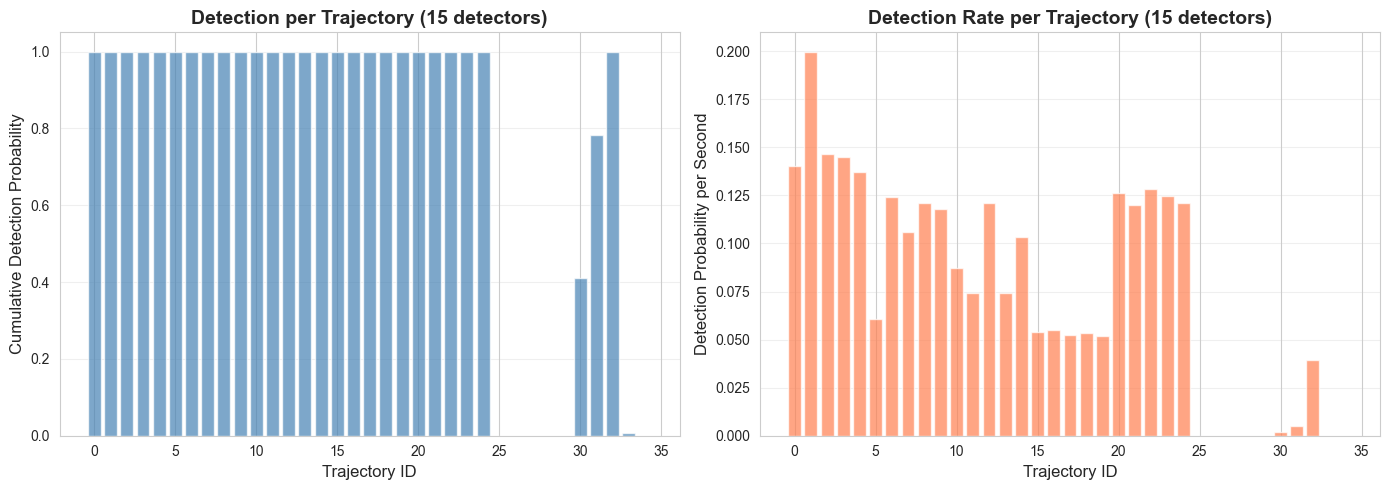

In [11]:
# Plot detection per trajectory
traj_analyzer_15.plot_trajectory_detection(figsize=(14, 5))
plt.show()

In [12]:
# Sliding window statistics across all trajectories
print("\n=== Sliding Window Statistics (across all trajectories) ===")
for window in ['5s', '10s', '30s', '60s']:
    stats = traj_analyzer_15.sliding_window_stats(window)
    print(f"\n{window} window:")
    for key, val in stats.items():
        print(f"  {key}: {val:.4f}")


=== Sliding Window Statistics (across all trajectories) ===

5s window:
  mean_of_means: 0.1507
  std_of_means: 0.1071
  min_across_all: 0.0000
  max_across_all: 1.0000
  mean_of_mins: 0.0000
  mean_of_maxs: 0.7628

10s window:
  mean_of_means: 0.1997
  std_of_means: 0.1397
  min_across_all: 0.0000
  max_across_all: 1.0000
  mean_of_mins: 0.0000
  mean_of_maxs: 0.7725

30s window:
  mean_of_means: 0.3578
  std_of_means: 0.2372
  min_across_all: 0.0000
  max_across_all: 1.0000
  mean_of_mins: 0.0000
  mean_of_maxs: 0.7771

60s window:
  mean_of_means: 0.4783
  std_of_means: 0.3307
  min_across_all: 0.0000
  max_across_all: 1.0000
  mean_of_mins: 0.0087
  mean_of_maxs: 0.7771


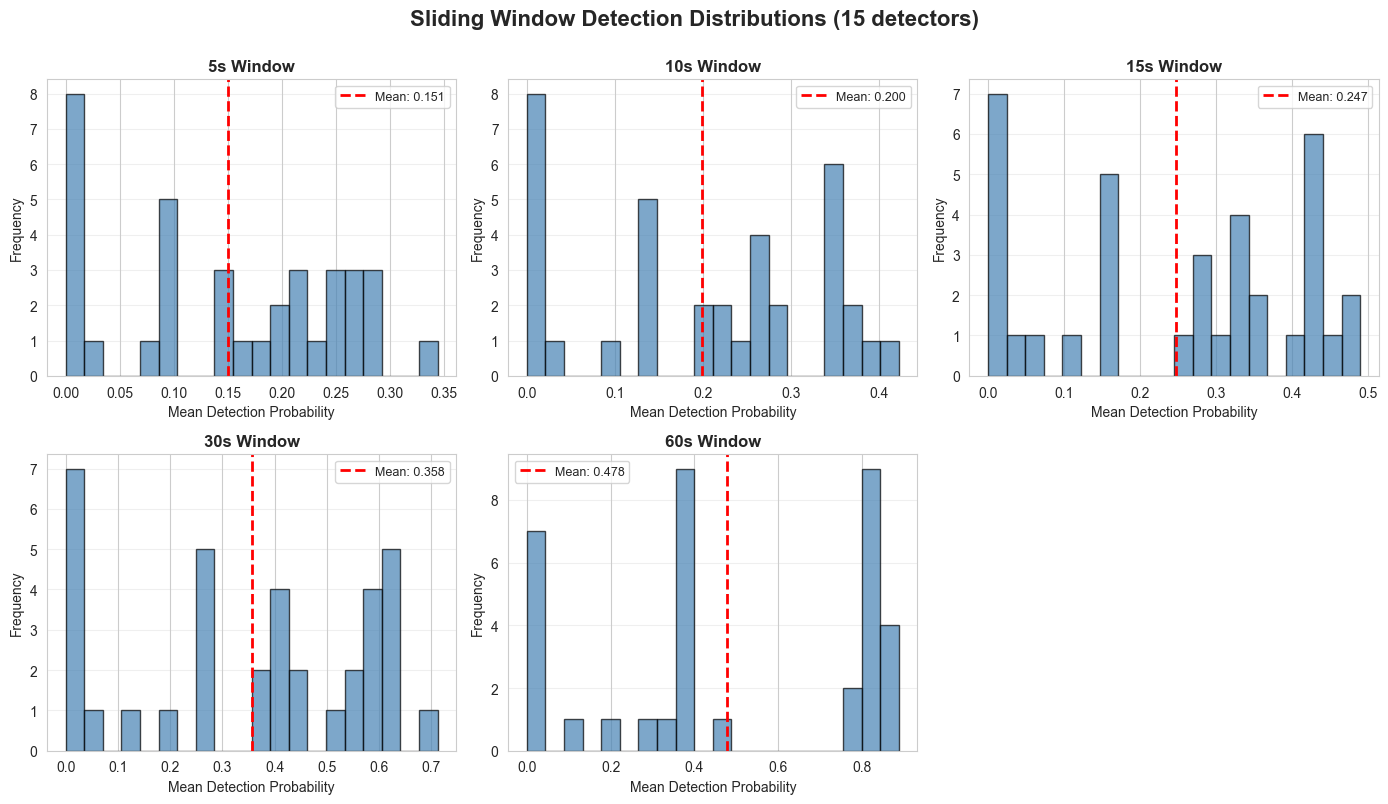

In [13]:
# Plot sliding window distributions
traj_analyzer_15.plot_sliding_windows_distribution(figsize=(14, 8))
plt.show()

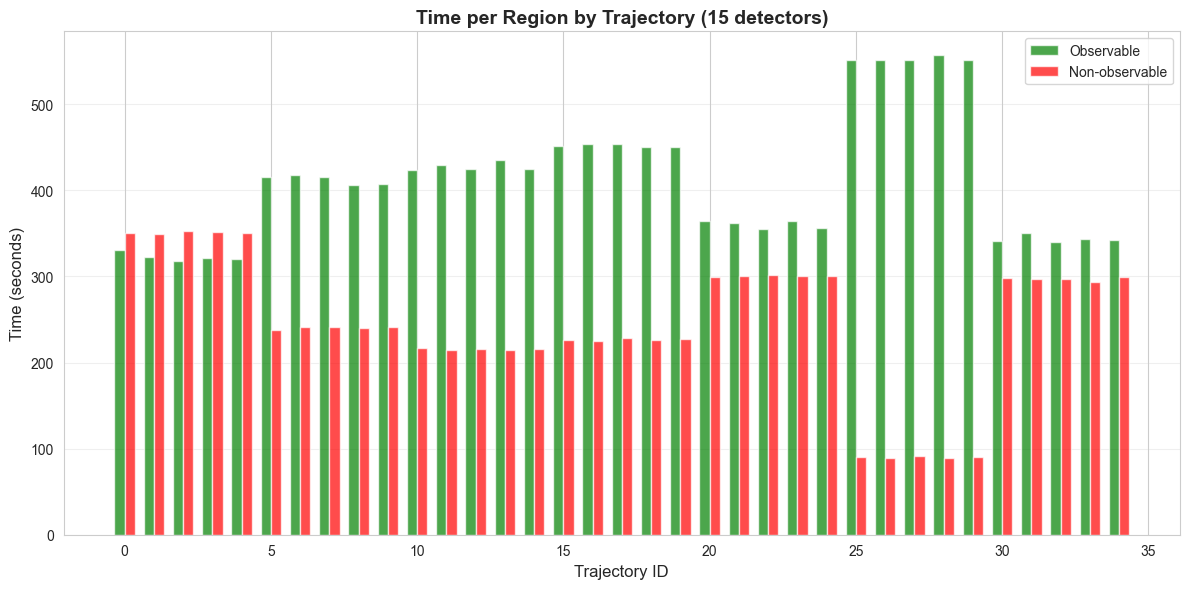

In [14]:
# Time comparison
traj_analyzer_15.plot_time_comparison(figsize=(12, 6))
plt.show()

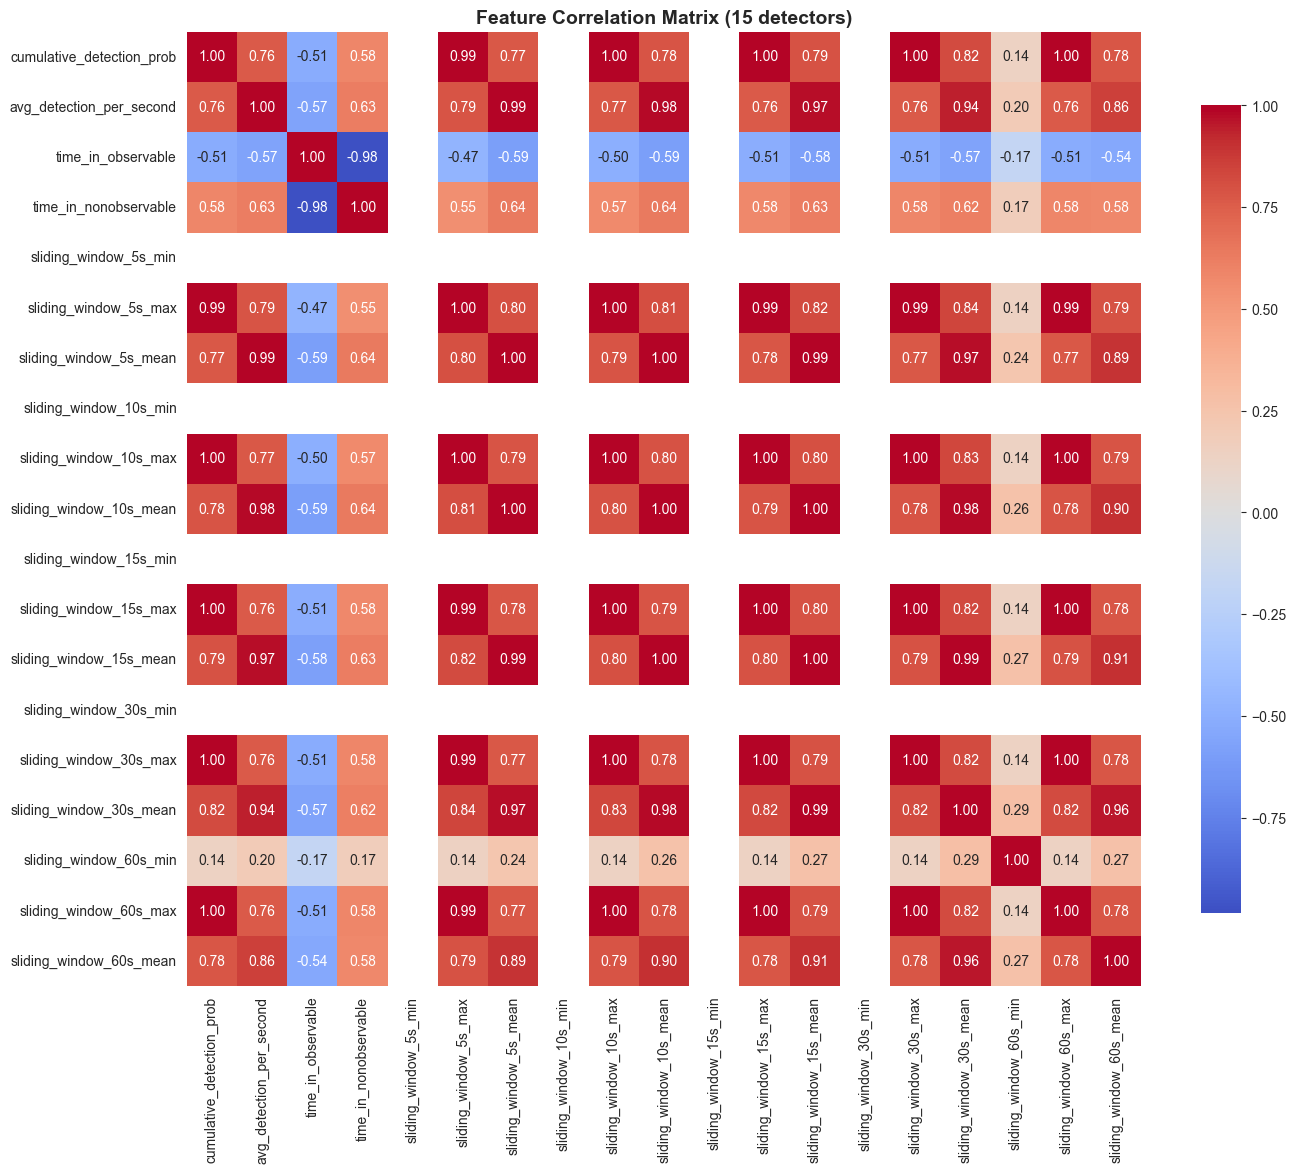

In [15]:
# Correlation matrix
traj_analyzer_15.correlation_matrix(figsize=(14, 12))
plt.show()

## Part 3: Comparing Different Detector Counts

Compare trajectory-level statistics across different detector configurations.

In [16]:
# Load multiple detector counts
detector_counts = [15, 20, 25, 30, 40]
trajectory_paths = [f'results/sweep_example/n{n}_detectors/with_detectors_exclude_observable.csv' 
                   for n in detector_counts]

# Create analyzers for each
analyzers = {n: TrajectoryAnalyzer(path) for n, path in zip(detector_counts, trajectory_paths)}

print("\n=== Comparison Across Detector Counts ===")
for n, analyzer in analyzers.items():
    print(f"\n{n} detectors:")
    print(f"  Mean cumulative detection: {analyzer.df['cumulative_detection_prob'].mean():.4f}")
    print(f"  Std cumulative detection: {analyzer.df['cumulative_detection_prob'].std():.4f}")
    print(f"  Mean detection per second: {analyzer.df['avg_detection_per_second'].mean():.4f}")
    print(f"  Std detection per second: {analyzer.df['avg_detection_per_second'].std():.4f}")


=== Comparison Across Detector Counts ===

15 detectors:
  Mean cumulative detection: 0.7771
  Std cumulative detection: 0.4016
  Mean detection per second: 0.0769
  Std detection per second: 0.0560

20 detectors:
  Mean cumulative detection: 1.0000
  Std cumulative detection: 0.0000
  Mean detection per second: 0.1319
  Std detection per second: 0.0560

25 detectors:
  Mean cumulative detection: 1.0000
  Std cumulative detection: 0.0000
  Mean detection per second: 0.1558
  Std detection per second: 0.0448

30 detectors:
  Mean cumulative detection: 0.8577
  Std cumulative detection: 0.3487
  Mean detection per second: 0.1554
  Std detection per second: 0.0913

40 detectors:
  Mean cumulative detection: 1.0000
  Std cumulative detection: 0.0001
  Mean detection per second: 0.1712
  Std detection per second: 0.0644


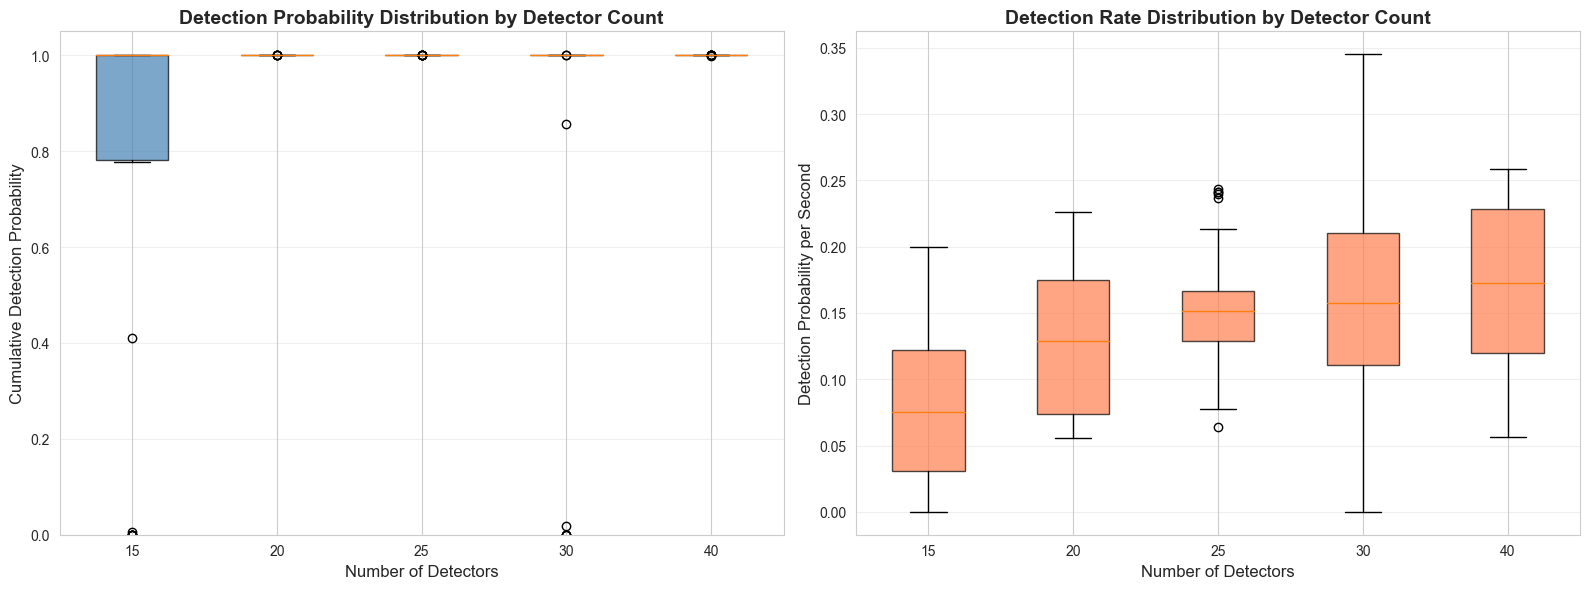

In [17]:
# Box plot comparison
compare_detector_counts(trajectory_paths, figsize=(16, 6))
plt.show()

### Sliding Window Comparison Across Detector Counts

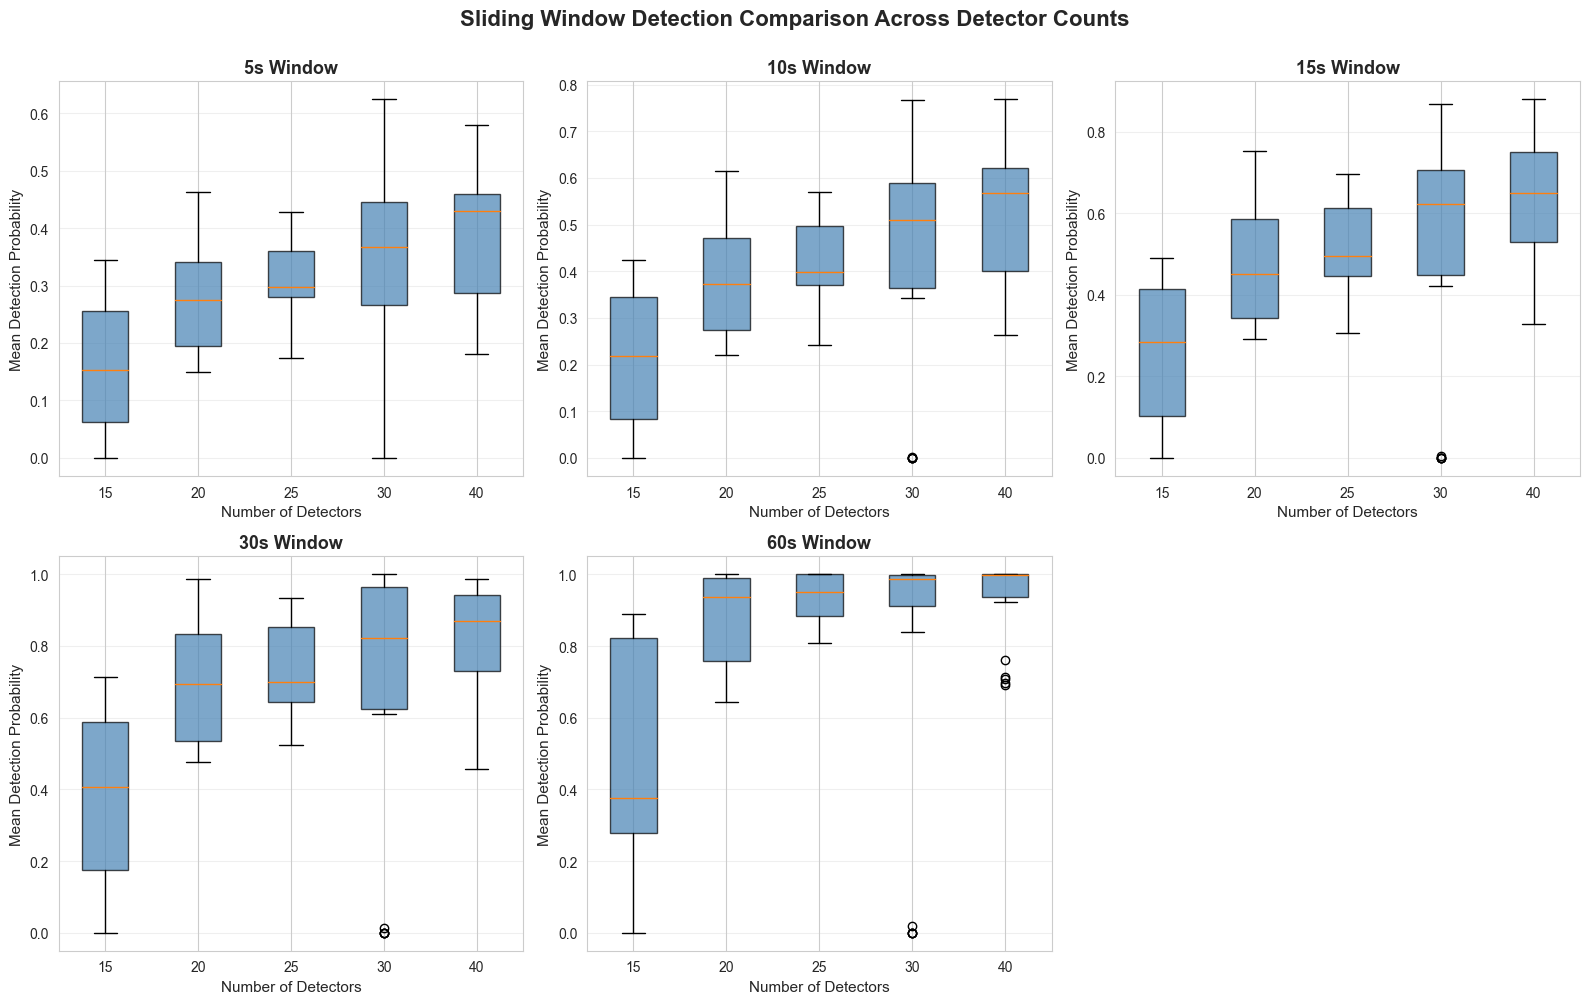

In [18]:
# Compare sliding window performance across detector counts
window_sizes = ['5s', '10s', '15s', '30s', '60s']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, window in enumerate(window_sizes):
    ax = axes[i]
    
    # Collect data for this window across all detector counts
    data = []
    labels = []
    for n in detector_counts:
        col = f'sliding_window_{window}_mean'
        data.append(analyzers[n].df[col])
        labels.append(str(n))
    
    bp = ax.boxplot(data, labels=labels, patch_artist=True)
    for patch in bp['boxes']:
        patch.set_facecolor('steelblue')
        patch.set_alpha(0.7)
    
    ax.set_xlabel('Number of Detectors', fontsize=11)
    ax.set_ylabel('Mean Detection Probability', fontsize=11)
    ax.set_title(f'{window} Window', fontsize=13, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')

# Remove extra subplot
fig.delaxes(axes[5])

plt.suptitle('Sliding Window Detection Comparison Across Detector Counts', 
            fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

## Part 4: Custom Analysis

Perform custom queries and analysis.

In [19]:
# Example: Find trajectories with lowest detection probability
print("\n=== Trajectories with Lowest Detection (15 detectors) ===")
worst_5 = traj_analyzer_15.df.nsmallest(5, 'cumulative_detection_prob')
print(worst_5[['trajectory_id', 'cumulative_detection_prob', 'avg_detection_per_second', 'time_in_nonobservable']])


=== Trajectories with Lowest Detection (15 detectors) ===
    trajectory_id  cumulative_detection_prob  avg_detection_per_second  \
25           25.0                        0.0                       0.0   
26           26.0                        0.0                       0.0   
27           27.0                        0.0                       0.0   
28           28.0                        0.0                       0.0   
29           29.0                        0.0                       0.0   

    time_in_nonobservable  
25                   90.0  
26                   89.0  
27                   91.0  
28                   89.0  
29                   90.0  


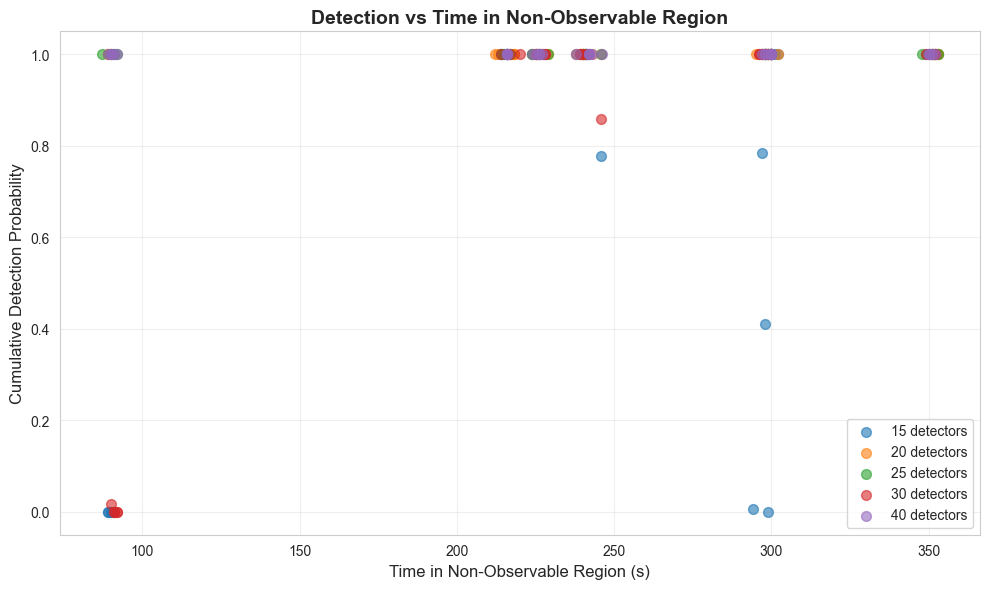

In [20]:
# Example: Analyze relationship between time in non-observable and detection
fig, ax = plt.subplots(figsize=(10, 6))

for n in detector_counts:
    analyzer = analyzers[n]
    ax.scatter(analyzer.df['time_in_nonobservable'], 
              analyzer.df['cumulative_detection_prob'],
              label=f'{n} detectors', alpha=0.6, s=50)

ax.set_xlabel('Time in Non-Observable Region (s)', fontsize=12)
ax.set_ylabel('Cumulative Detection Probability', fontsize=12)
ax.set_title('Detection vs Time in Non-Observable Region', fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


=== Mean Sliding Window Detection by Detector Count ===
 n_detectors       5s      10s      15s      30s      60s
          15 0.150750 0.199712 0.247300 0.357785 0.478348
          20 0.284562 0.387810 0.476979 0.692578 0.882299
          25 0.316929 0.424683 0.517709 0.739216 0.937234
          30 0.337216 0.450189 0.544116 0.728812 0.837758
          40 0.385515 0.523767 0.629216 0.821014 0.947297


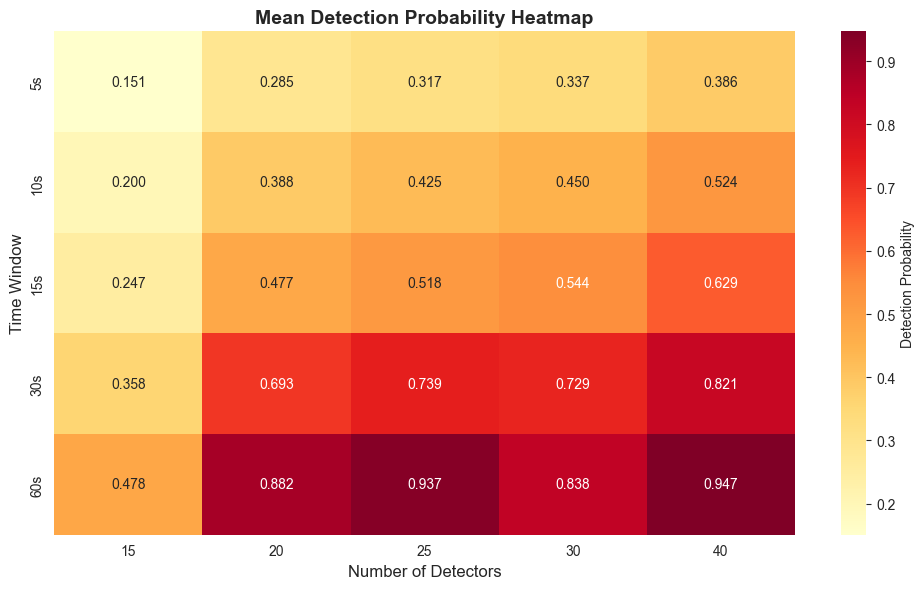

In [21]:
# Example: Mean detection probability for each time window (all detector counts)
window_comparison = pd.DataFrame({
    'n_detectors': detector_counts,
    '5s': [analyzers[n].df['sliding_window_5s_mean'].mean() for n in detector_counts],
    '10s': [analyzers[n].df['sliding_window_10s_mean'].mean() for n in detector_counts],
    '15s': [analyzers[n].df['sliding_window_15s_mean'].mean() for n in detector_counts],
    '30s': [analyzers[n].df['sliding_window_30s_mean'].mean() for n in detector_counts],
    '60s': [analyzers[n].df['sliding_window_60s_mean'].mean() for n in detector_counts]
})

print("\n=== Mean Sliding Window Detection by Detector Count ===")
print(window_comparison.to_string(index=False))

# Plot as heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(window_comparison.set_index('n_detectors').T, 
           annot=True, fmt='.3f', cmap='YlOrRd', 
           cbar_kws={'label': 'Detection Probability'}, ax=ax)
ax.set_xlabel('Number of Detectors', fontsize=12)
ax.set_ylabel('Time Window', fontsize=12)
ax.set_title('Mean Detection Probability Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()